# Multi-variate Linear Regression

## Programming lab: 041_04 Gradient Descent Method

2개의 독립변수를 사용하는 모델은
$$ \hat{y} = w_{1}x_{1} + w_{2}x_{2} + w_{0}$$
와 같이 표현할 수 있습니다.
  
이번 실습에서는 다음의 단계들을 통해 $$\hat{y} = w_{1}x_{1} + w_{2}x_{2} + w_{0}$$에 대해 gradient descent method를 적용하여 $w_{1}, w_{2}, w_{0}$을 학습시킵니다.

<ul>
    <li> Step 1. Dataset Preparation </li>
    <li> Step 2. One Iteration of GDM </li>
    <li> Step 3. Gradient Descent Method </li>
</ul>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#from LR_dataset_generator import LR_dataset_generator
from sklearn.datasets import make_regression

from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

plt.style.use('seaborn')
np.random.seed(0)

***
## Step 1. Dataset Preparation

이번 실습을 위한 dataset은
$$y = w_{1}x_{1} + w_{2}x_{2} + w_{0}$$
으로부터 생성합니다.

바이어스($w_{0}$)는 3.0, noise는 0.0의 300개의 data sample을 가지는 dataset을 생성합니다.

In [2]:
##### Start Your Code(dataset parameter Setting) #####
n_samples = 300
n_features = 2
bias = 3.0
noise = 0.0
##### End Your Code(dataset parameter Setting) #####

X, Y, w = make_regression(
    n_samples=n_samples, n_features=n_features, bias=bias,
    noise=noise, coef=True, random_state=1)

print(X.shape)
print(w)
print('y = ' + str(w[0]) + ' x1 + ' + str(w[1]) + ' x2 + ' + str(bias))

(300, 2)
[64.77706332 17.97942977]
y = 64.77706331874812 x1 + 17.97942976929744 x2 + 3.0


**Expected Output**  
(300, 2)  
[64.77706332 17.97942977]  
y = 64.77706331874812 x1 + 17.97942976929744 x2 + 3.0

***
## Step 2. One Iteration of GDM

위의 dataset에 따라 predictor는
$$ \hat{y} = w_{1}x_{1} + w_{2}x_{2} + w_{0}$$
로 설정할 수 있습니다.

그리고 <i>i</i>번째 data sample에 대한 loss($\mathcal{L}^{(i)}$)는 
$$ \mathcal{L}^{(i)} = (\hat{y}^{(i)} - y^{(i)})^{2} = ((w_{1}x_{1}^{(i)}+w_{2}x_{2}^{(i)}+w_{0}) - y^{(i)})^{2}$$
로 정의됩니다.

따라서 $w_{1}, w_{2}, w_{0}$에 대한 $\mathcal{L}^{(i)}$의 partial derivative는
$$ \frac{\partial \mathcal{L}^{(i)}}{\partial w_{1}} = 2(\hat{y}^{(i)} - y^{(i)})x_{1}^{(i)}$$
$$ \frac{\partial \mathcal{L}^{(i)}}{\partial w_{2}} = 2(\hat{y}^{(i)} - y^{(i)})x_{2}^{(i)}$$
$$ \frac{\partial \mathcal{L}^{(i)}}{\partial w_{0}} = 2(\hat{y}^{(i)} - y^{(i)})$$
입니다.

마지막으로 이를 이용한 Gradient descent method는

$$ w_{1} := w_{1} - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial w_{1}} = w_{1} - 2\alpha (\hat{y}^{(i)} - y^{(i)}) x_{1}^{(i)}$$
$$ w_{2} := w_{2} - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial w_{2}} = w_{2} - 2\alpha (\hat{y}^{(i)} - y^{(i)}) x_{2}^{(i)}$$
$$ w_{0} := w_{0} - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial w_{0}} = w_{0} - 2\alpha (\hat{y}^{(i)} - y^{(i)})$$
입니다.

***
**Programming**  
아래에서 제시하는 data sample에 대하여 한 번의 iteration을 수행하여 가중치의 변화를 확인해 보세요.  
이때 학습 조건은 다음과 같습니다.
- initial $w_{1}, w_{2}, w_{0}$ = 1, 1, 1
- learning rate = 0.01
- $x_{1}$, $x_{2}, y$ = 2, 1, 6

In [3]:
##### Start Your Code(Initial Setting) #####
w1, w2, w0 = 1, 1, 1
lr = 0.01
x1 = 2
x2 = 1
y = 6
##### End Your Code(Initial Setting) #####
print("Before Update:", w1, w2, w0)

##### Start Your Code(Partial Derivative Calculation) #####
pred = w1*x1 + w2*x2 + w0
dw1 = 2*(pred-y)*x1
dw2 = 2*(pred-y)*x2
dw0 = 2*(pred-y)
##### Start Your Code(Partial Derivative Calculation) #####

##### Start Your Code(Gradient Descent Method) #####
w1 = w1 - lr*dw1
w2 = w2 - lr*dw2
w0 = w0 - lr*dw0
##### Start Your Code(Gradient Descent Method) #####
print("After Update:", w1, w2, w0)

Before Update: 1 1 1
After Update: 1.08 1.04 1.04


**Expected Output**  
Before Update: 1 1 1 
<br>After Update: 1.08 1.04 1.04

***
## Step 3. Gradient Descent Method

Step 1에서 생성한 dataset의 data sample들을 이용하여 $w_{1}, w_{2}, w_{0}$를 학습시킵니다.

***
**Programming**  
for loop을 이용하여 data sample에 접근하고, 각 data sample에 대해 GDM을 적용하여 $w_{1}, w_{2}, w_{0}$를 학습시키세요.  
이때 학습 조건은 다음과 같습니다.
- $w_{1}, w_{2}, w_{0}$ = 0.1, 0.1, 0.1
- learning rate = 0.01
- epochs = 3

학습이 끝나면 target function이 앞에서 생성한 가중치([64.77706332 17.97942977])와 바이어스(3.0)에 가까워지도록 $w_{1}, w_{2}, w_{0}$가 학습되는지 확인하세요.

predicted weights: 
64.77705905323764 17.97942668979246 3.0000018217161846


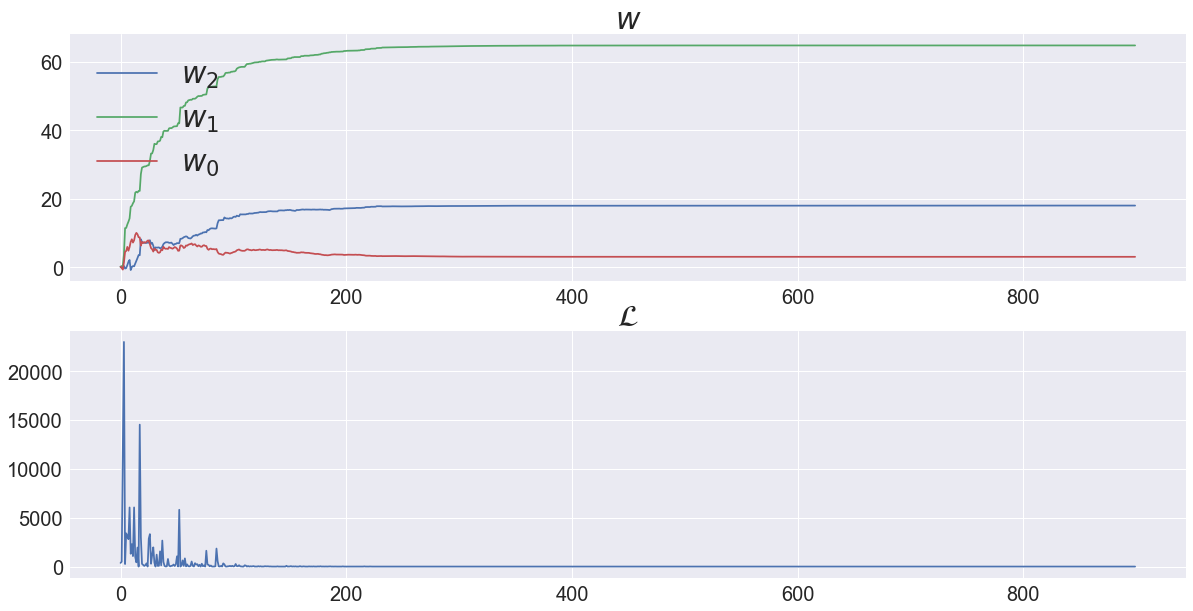

In [8]:
##### Start Your Code(Learning Preparation) #####
w1, w2, w0 = 0.1, 0.1, 0.1
lr = 0.01
epochs = 3
##### End Your Code(Learning Preparation) #####

w1_list, w2_list, w0_list = [], [], []
loss_list = []

for epoch in range(epochs):
    for samp, y in zip(X, Y):
        x1, x2 = samp[0], samp[1]
        
        ##### Start Your Code(Forward Propagation) #####
        pred = w1*x1 + w2*x2 + w0
        loss = (pred - y) ** 2
        ##### Start Your Code(Forward Propagation) #####

        w1_list.append(w1)
        w2_list.append(w2)
        w0_list.append(w0)
        loss_list.append(loss)
        
        ##### Start Your Code(Partial Derivative Calculation) #####
        pred = w1*x1 + w2*x2 + w0
        dw1 = 2*(pred-y)*x1
        dw2 = 2*(pred-y)*x2
        dw0 = 2*(pred-y)
        ##### Start Your Code(Partial Derivative Calculation) #####

        ##### Start Your Code(Gradient Descent Method) #####
        w1 = w1 - lr*dw1
        w2 = w2 - lr*dw2
        w0 = w0 - lr*dw0
        ##### Start Your Code(Gradient Descent Method) #####

print('predicted weights: ')
print(w1, w2, w0)

fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(w2_list, label = r'$w_{2}$')
ax[0].plot(w1_list, label = r'$w_{1}$')
ax[0].plot(w0_list, label = r'$w_{0}$')
ax[0].legend(loc = 'upper left', fontsize = 30)
ax[1].plot(loss_list)
ax[0].set_title(r'$w$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)
for ax_idx in range(2):
    ax[ax_idx].tick_params(axis = 'both', labelsize = 20)

**Expected Output**  
predicted weights:  
64.77705905323764 17.97942668979246 3.0000018217161846  
<img src="./imgs/03_01.png">

위의 결과를 보게 되면 mean은 0, standard deviation은 1로 설정되었기 때문에<br>
$w$들간의 학습 속도가 동일하게 진행되는 것을 확인할 수 있다<br>